In [17]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Python: {}'.format(scipy.version))
import numpy
print('Python: {}'.format(numpy.version))
import matplotlib
print('Python: {}'.format(matplotlib))
import pandas as pd
print('Python: {}'.format(pandas))
import sklearn
print('Python: {}'.format(sklearn))


Python: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
Python: <module 'scipy.version' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\scipy\\version.py'>
Python: <module 'numpy.version' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\numpy\\version.py'>
Python: <module 'matplotlib' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\matplotlib\\__init__.py'>
Python: <module 'pandas' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\pandas\\__init__.py'>
Python: <module 'sklearn' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\sklearn\\__init__.py'>


In [2]:
from pandas import read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "../../data/processed/naz/tanpabola4.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

print(dataset.head(10))

   lam_max1      csc_max1  lam_min       csc_min  lam_fwhm1         c_mid  \
0       408  2.774638e-14      434  2.264798e-14        464  4.239645e-14   
1       410  2.984472e-14      432  2.725996e-14        464  4.555423e-14   
2       362  2.400898e-14      390  1.436011e-14        442  4.153600e-14   
3       364  2.971955e-14      392  1.702803e-14        412  4.696978e-14   
4       366  3.552294e-14      392  1.962838e-14        412  5.500586e-14   
5       366  3.979963e-14      392  2.153163e-14        412  6.262032e-14   
6       408  1.600910e-14      430  1.309086e-14        454  2.136122e-14   
7       408  2.774638e-14      434  2.264798e-14        464  4.239645e-14   
8       410  2.984472e-14      432  2.725996e-14        464  4.555423e-14   
9       362  2.400898e-14      390  1.436011e-14        442  4.153600e-14   

   lam_max2      csc_max2  lam_fwhm2  fwhm  ...  posisi2  posisi3  posisi4  \
0       474  6.214492e-14        484    20  ...        0        0        0

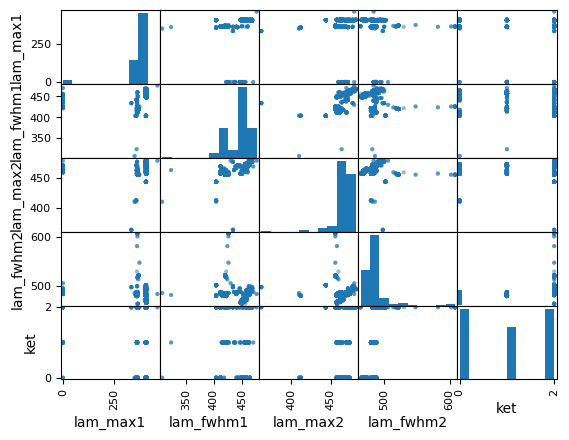

In [4]:
#scatter_matrix(dataset[['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','ket']])
scatter_matrix(dataset[['lam_max1', 'lam_fwhm1','lam_max2','lam_fwhm2','ket']])
plt.show()

In [5]:
# Split-out validation dataset
array = dataset
X = array.iloc[:,0:10].values
y = array.iloc[:,20].values
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.50,
    random_state=1
)

print(len(Y_train))
print(len(Y_validation))
print(len(Y_validation)/(len(Y_train) + len(Y_validation)))

693
693
0.5


In [6]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.650789 (0.003390)
LDA: 0.753194 (0.036431)
KNN: 0.887462 (0.011382)
CART: 0.924947 (0.011652)
NB: 0.698518 (0.073158)
SVM: 0.913420 (0.000125)


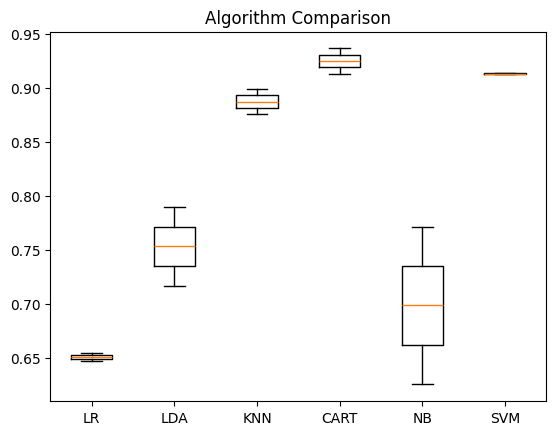

In [7]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [8]:
# Make predictions on validation dataset
model1 = SVC(gamma='auto')
model1.fit(X_train, Y_train)
Y_predict = model1.predict(X_validation)

In [9]:
# Evaluate predictions using SVM
print("accurancy = ",
     accuracy_score(
         Y_validation, Y_predict))
cf = confusion_matrix(Y_validation, Y_predict)
print("\nconfusion matrix =\n", cf)

print("\nreport = \n", 
     classification_report(
         Y_validation, Y_predict))

accurancy =  0.937950937950938

confusion matrix =
 [[217   0  34]
 [  0 186   0]
 [  9   0 247]]

report = 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       251
           1       1.00      1.00      1.00       186
           2       0.88      0.96      0.92       256

    accuracy                           0.94       693
   macro avg       0.95      0.94      0.94       693
weighted avg       0.94      0.94      0.94       693



## test

In [10]:
url2 = "../../data/processed/den/tanpabola4.xlsx"
names2 = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset2 = read_excel(url2, names=names2, header=None)

array2 = dataset2
print(len (array2))
X_test5 = array2.iloc[151:157,0:10].values
y_test5 = array2.iloc[151:157,20].values
X_test6 = array2.iloc[11:17,0:10].values
y_test6 = array2.iloc[11:17,20].values
X_test7 = array2.iloc[291:301,0:10].values
y_test7 = array2.iloc[291:301,20].values

predictions = model1.predict(X_test5)
print(predictions)
print(y_test5)

predictions = model1.predict(X_test6)
print(predictions)
print(y_test6)

predictions = model1.predict(X_test7)
print(predictions)
print(y_test7)


1386
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[2 2 0 2 0 2]
[0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [11]:
array2.shape

(1386, 21)

## Data uji 4 bola dengan data latih tanpa 4 bola

In [12]:
url3 = "../../data/processed/den/4bola.xlsx"
names2 = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset3 = read_excel(url3, names=names2, header=None)

array3 = dataset3
print(len (array3))
X_ntest = array3.iloc[:,0:10].values
Y_ntest = array3.iloc[:,20].values

Y_npredict = model1.predict(X_ntest)
print(Y_npredict)
print(Y_ntest)


315
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [13]:
# Evaluate predictions using SVM
print("accurancy = ",
     accuracy_score(
         Y_ntest, Y_npredict))
cf = confusion_matrix(Y_ntest, Y_npredict)
print("\nconfusion matrix =\n", cf)

print("\nreport = \n", 
     classification_report(
         Y_ntest, Y_npredict))

accurancy =  0.40634920634920635

confusion matrix =
 [[  0   0   0]
 [  2   2 185]
 [  0   0 126]]

report = 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.01      0.02       189
           2       0.41      1.00      0.58       126

    accuracy                           0.41       315
   macro avg       0.47      0.34      0.20       315
weighted avg       0.76      0.41      0.24       315



d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
df_Y = pd.DataFrame(Y_train)

In [20]:
df_Y.value_counts()

0
0    253
2    248
1    192
Name: count, dtype: int64

In [ ]:
dataset3['ket'].value_counts()